<a href="https://colab.research.google.com/github/davidnunez42/medical-school-acceptances/blob/main/AAMC_Medical_School_Acceptances_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install numpy
import numpy as np

import warnings
warnings.filterwarnings('ignore')

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

from google.colab import files

# **Practicing uploading Excel files**
*(potentially not relevant to my research question)*

In [2]:
uploaded = files.upload()

Saving 2024_FACTS_Table_B-10.xlsx to 2024_FACTS_Table_B-10.xlsx


In [3]:
df = pd.read_excel('2024_FACTS_Table_B-10.xlsx')
df = df.drop([0, 1, 2])
df.head()

,"Table B-10: MCAT® Scores and GPAs for MD-PhD Applicants and\n Matriculants to U.S. MD-Granting Medical Schools, Academic Years 2019-2020 through 2024-2025",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
3,MD-PhD Applicants,NaN,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025
4,MCAT CPBS,Mean,127.7,127.8,127.6,127.8,127.8,127.7
5,NaN,SD,2.8,2.8,2.9,2.9,3,3.1
6,NaN,Minimum,118,118,118,118,118,118
7,NaN,Maximum,132,132,132,132,132,132


In [4]:
uploaded_2 = files.upload()

Saving 2024_FACTS_Table_1.xlsx to 2024_FACTS_Table_1.xlsx


In [5]:
table_df = pd.read_excel('2024_FACTS_Table_1.xlsx')
table_df = table_df.drop([0, 1, 2, 3, 5, 7, 9])
table_df = table_df.rename(columns={'Table 1: Applicants, Matriculants, Enrollment, and Graduates of U.S. MD-Granting Medical Schools, 2015-2016 through 2024-2025': 'Applicants, Matriculants, Enrollments, and Graduates', 'Unnamed: 3': '2015-2016', 'Unnamed: 4': '2016-2017', 'Unnamed: 5': '2017-2018', 'Unnamed: 6': '2018-2019', 'Unnamed: 7': '2019-2020', 'Unnamed: 8': '2020-2021', 'Unnamed: 9': '2021-2022', 'Unnamed: 10': '2022-2023', 'Unnamed: 11': '2023-2024', 'Unnamed: 12': '2024-2025'})
table_df.head(7)

,"Applicants, Matriculants, Enrollments, and Graduates",Unnamed: 1,Unnamed: 2,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025
4,Applicants,NaN,NaN,52549,53042,51680,52777,53369,53030,62443,55189,52577,51946
6,Matriculants,NaN,NaN,20631,21030,21338,21622,21869,22239,22666,22710,22980,23156
8,Enrollment,NaN,NaN,86583,88176,89727,91217,92620,94068,95340,96385,97797,99562
10,Graduates,NaN,NaN,18943,19262,19562,19935,20390,20926,21057,20927,20869,-


# **MCAT Scores/GPAs for Applicants and Matriculants**
*(separated by sex, years 2018-2019 to 2024-2025)*

In [6]:
uploaded_3 = files.upload()

Saving 2024_FACTS_Table_A-21.xlsx to 2024_FACTS_Table_A-21.xlsx


In [7]:
print("MCAT Scores and GPAs for Applicants, separated by sex, 2018-2019 to 2024-2025")
print("\n")
applicants_scores_df = pd.read_excel('2024_FACTS_Table_A-21.xlsx')
applicants_scores_df = applicants_scores_df.drop([0, 1, 2, 3, 4, 26])
applicants_scores_df = applicants_scores_df.rename(columns={'Table A-21: MCAT Scores and GPAs for Applicants to U.S. MD-Granting Medical Schools by Gender, Academic Years 2018-2019 through 2024-2025': 'Applicants (With Years)',
                                                                'Unnamed: 1': 'Sex', 'Unnamed: 2': 'MCAT CPBS (Mean)', 'Unnamed: 3': 'MCAT CPBS (SD)', 'Unnamed: 4': 'MCAT CARS (Mean)',
                                                                'Unnamed: 5': 'MCAT CARS(SD)', 'Unnamed: 6': 'MCAT BBLS (Mean)', 'Unnamed: 7': 'MCAT BBLS (SD)', 'Unnamed: 8': 'MCAT PSBB (Mean)',
                                                                'Unnamed: 9': 'MCAT PSBB (SD)', 'Unnamed: 10': 'Total MCAT (Mean)', 'Unnamed: 11': 'Total MCAT (SD)', 'Unnamed: 12': 'GPA Science (Mean)',
                                                                'Unnamed: 13': 'GPA Science (SD)', 'Unnamed: 14': 'GPA Non-Science (Mean)', 'Unnamed: 15': 'GPA Non-Science (SD)', 'Unnamed: 16': 'GPA Total (Mean)',
                                                                'Unnamed: 17': 'GPA Total (SD)', 'Unnamed: 18': 'Total # of Applicants'})
applicants_scores_df.loc[6] = applicants_scores_df.loc[6].fillna("2018-2019")
applicants_scores_df.loc[7] = applicants_scores_df.loc[7].fillna("2018-2019")
applicants_scores_df.loc[9] = applicants_scores_df.loc[9].fillna("2019-2020")
applicants_scores_df.loc[10] = applicants_scores_df.loc[10].fillna("2019-2020")
applicants_scores_df.loc[12] = applicants_scores_df.loc[12].fillna("2020-2021")
applicants_scores_df.loc[13] = applicants_scores_df.loc[13].fillna("2020-2021")
applicants_scores_df.loc[15] = applicants_scores_df.loc[15].fillna("2021-2022")
applicants_scores_df.loc[16] = applicants_scores_df.loc[16].fillna("2021-2022")
applicants_scores_df.loc[18] = applicants_scores_df.loc[18].fillna("2022-2023")
applicants_scores_df.loc[19] = applicants_scores_df.loc[19].fillna("2022-2023")
applicants_scores_df.loc[21] = applicants_scores_df.loc[21].fillna("2023-2024")
applicants_scores_df.loc[22] = applicants_scores_df.loc[22].fillna("2023-2024")
applicants_scores_df.loc[24] = applicants_scores_df.loc[24].fillna("2024-2025")
applicants_scores_df.loc[25] = applicants_scores_df.loc[25].fillna("2024-2025")
applicants_scores_df.head(30)

MCAT Scores and GPAs for Applicants, separated by sex, 2018-2019 to 2024-2025




,Applicants (With Years),Sex,MCAT CPBS (Mean),MCAT CPBS (SD),MCAT CARS (Mean),MCAT CARS(SD),MCAT BBLS (Mean),MCAT BBLS (SD),MCAT PSBB (Mean),MCAT PSBB (SD),Total MCAT (Mean),Total MCAT (SD),GPA Science (Mean),GPA Science (SD),GPA Non-Science (Mean),GPA Non-Science (SD),GPA Total (Mean),GPA Total (SD),Total # of Applicants
5,2018-2019,Men,127,2.6,126,2.7,127.1,2.6,127,2.6,507.2,8.8,3.5,0.41,3.68,0.3,3.57,0.34,25875
6,2018-2019,Women,125.7,2.7,125.7,2.8,126.1,2.7,126.7,2.8,504.1,9.5,3.44,0.44,3.74,0.26,3.57,0.34,26882
7,2018-2019,All,126.3,2.7,125.9,2.7,126.6,2.7,126.8,2.7,505.6,9.3,3.47,0.43,3.71,0.28,3.57,0.34,52757
8,2019-2020,Men,127.1,2.6,126.1,2.7,127.2,2.6,127.3,2.6,507.7,8.8,3.51,0.41,3.69,0.3,3.58,0.34,25493
9,2019-2020,Women,125.8,2.8,125.7,2.8,126.2,2.8,126.9,2.8,504.6,9.6,3.45,0.44,3.75,0.26,3.58,0.33,27847
10,2019-2020,All,126.4,2.8,125.9,2.7,126.7,2.7,127.1,2.7,506.1,9.3,3.48,0.43,3.72,0.28,3.58,0.33,53340
11,2020-2021,Men,127.2,2.6,126,2.6,127.3,2.5,127.4,2.6,508,8.7,3.52,0.4,3.71,0.29,3.6,0.33,24620
12,2020-2021,Women,125.9,2.8,125.8,2.7,126.3,2.7,127.1,2.8,505,9.5,3.47,0.43,3.76,0.26,3.6,0.33,28343
13,2020-2021,All,126.5,2.8,125.9,2.7,126.8,2.7,127.2,2.7,506.4,9.2,3.49,0.42,3.74,0.28,3.6,0.33,52963
14,2021-2022,Men,127.1,2.7,125.9,2.7,127.3,2.7,127.5,2.7,507.9,9.1,3.52,0.41,3.71,0.3,3.6,0.34,26948


In [8]:
uploaded_4 = files.upload()

Saving 2024_FACTS_Table_A-22.xlsx to 2024_FACTS_Table_A-22.xlsx


In [9]:
print("MCAT Scores and GPAs for Matriculants, separated by sex, 2018-2019 to 2024-2025")
print("\n")
matriculants_scores_df = pd.read_excel('2024_FACTS_Table_A-22.xlsx')
matriculants_scores_df = matriculants_scores_df.drop([0, 1, 2, 3, 4, 26])
matriculants_scores_df = matriculants_scores_df.rename(columns={'Table A-22: MCAT Scores and GPAs for Matriculants to U.S. MD-Granting Medical Schools by Gender, Academic Years 2018-2019 through 2024-2025': 'Matriculants (With Years)',
                                                                'Unnamed: 1': 'Sex', 'Unnamed: 2': 'MCAT CPBS (Mean)', 'Unnamed: 3': 'MCAT CPBS (SD)', 'Unnamed: 4': 'MCAT CARS (Mean)',
                                                                'Unnamed: 5': 'MCAT CARS(SD)', 'Unnamed: 6': 'MCAT BBLS (Mean)', 'Unnamed: 7': 'MCAT BBLS (SD)', 'Unnamed: 8': 'MCAT PSBB (Mean)',
                                                                'Unnamed: 9': 'MCAT PSBB (SD)', 'Unnamed: 10': 'Total MCAT (Mean)', 'Unnamed: 11': 'Total MCAT (SD)', 'Unnamed: 12': 'GPA Science (Mean)',
                                                                'Unnamed: 13': 'GPA Science (SD)', 'Unnamed: 14': 'GPA Non-Science (Mean)', 'Unnamed: 15': 'GPA Non-Science (SD)', 'Unnamed: 16': 'GPA Total (Mean)',
                                                                'Unnamed: 17': 'GPA Total (SD)', 'Unnamed: 18': 'Total # of Matriculants'})
matriculants_scores_df.loc[6] = matriculants_scores_df.loc[6].fillna("2018-2019")
matriculants_scores_df.loc[7] = matriculants_scores_df.loc[7].fillna("2018-2019")
matriculants_scores_df.loc[9] = matriculants_scores_df.loc[9].fillna("2019-2020")
matriculants_scores_df.loc[10] = matriculants_scores_df.loc[10].fillna("2019-2020")
matriculants_scores_df.loc[12] = matriculants_scores_df.loc[12].fillna("2020-2021")
matriculants_scores_df.loc[13] = matriculants_scores_df.loc[13].fillna("2020-2021")
matriculants_scores_df.loc[15] = matriculants_scores_df.loc[15].fillna("2021-2022")
matriculants_scores_df.loc[16] = matriculants_scores_df.loc[16].fillna("2021-2022")
matriculants_scores_df.loc[18] = matriculants_scores_df.loc[18].fillna("2022-2023")
matriculants_scores_df.loc[19] = matriculants_scores_df.loc[19].fillna("2022-2023")
matriculants_scores_df.loc[21] = matriculants_scores_df.loc[21].fillna("2023-2024")
matriculants_scores_df.loc[22] = matriculants_scores_df.loc[22].fillna("2023-2024")
matriculants_scores_df.loc[24] = matriculants_scores_df.loc[24].fillna("2024-2025")
matriculants_scores_df.loc[25] = matriculants_scores_df.loc[25].fillna("2024-2025")
matriculants_scores_df.head(30)

MCAT Scores and GPAs for Matriculants, separated by sex, 2018-2019 to 2024-2025




,Matriculants (With Years),Sex,MCAT CPBS (Mean),MCAT CPBS (SD),MCAT CARS (Mean),MCAT CARS(SD),MCAT BBLS (Mean),MCAT BBLS (SD),MCAT PSBB (Mean),MCAT PSBB (SD),Total MCAT (Mean),Total MCAT (SD),GPA Science (Mean),GPA Science (SD),GPA Non-Science (Mean),GPA Non-Science (SD),GPA Total (Mean),GPA Total (SD),Total # of Matriculants
5,2018-2019,Men,128.2,2.1,127.1,2.3,128.4,2,128.3,2.1,511.9,6.5,3.66,0.3,3.77,0.24,3.71,0.25,10454
6,2018-2019,Women,127.3,2.1,127.2,2.3,127.7,2.1,128.3,2,510.5,6.5,3.64,0.3,3.83,0.19,3.73,0.23,11160
7,2018-2019,All,127.7,2.1,127.1,2.3,128,2.1,128.3,2.1,511.2,6.5,3.65,0.3,3.8,0.21,3.72,0.24,21614
8,2019-2020,Men,128.3,2.1,127.1,2.3,128.4,2,128.5,2,512.3,6.4,3.67,0.3,3.78,0.24,3.72,0.25,10402
9,2019-2020,Women,127.3,2.1,127.1,2.3,127.8,2,128.6,2,510.8,6.5,3.65,0.31,3.84,0.19,3.73,0.23,11461
10,2019-2020,All,127.8,2.2,127.1,2.3,128.1,2.1,128.5,2,511.5,6.5,3.66,0.3,3.81,0.22,3.73,0.24,21863
11,2020-2021,Men,128.3,2.1,127,2.3,128.4,2,128.6,2,512.3,6.4,3.68,0.31,3.79,0.23,3.72,0.25,10271
12,2020-2021,Women,127.4,2.1,127,2.3,127.8,2,128.6,2,510.9,6.4,3.65,0.31,3.84,0.18,3.74,0.23,11926
13,2020-2021,All,127.8,2.2,127,2.3,128.1,2,128.6,2,511.5,6.5,3.66,0.31,3.82,0.21,3.73,0.24,22197
14,2021-2022,Men,128.3,2.1,126.9,2.4,128.6,2,128.8,2,512.6,6.6,3.68,0.31,3.8,0.23,3.73,0.25,10057


# **Applicants, First-Time Applicants, Acceptees, and Matriculants**
*(separated by sex, adjusted to years 2018-2019 to 2024-2025)*

In [10]:
uploaded_5 = files.upload()

Saving 2024_FACTS_Table_A-7.2.xlsx to 2024_FACTS_Table_A-7.2.xlsx


In [46]:
print("Applicants, First-Time Applicants, Acceptees, and Matriculants, separated by sex, adjusted to 2018-2019 to 2024-2025")
print("\n")
total_counts_df = pd.read_excel('2024_FACTS_Table_A-7.2.xlsx')
total_counts_df = total_counts_df.drop([0, 1, 2, 3, 11, 19, 27, 35])
total_counts_df = total_counts_df.drop(columns="Unnamed: 3")
total_counts_df = total_counts_df.drop(columns="Unnamed: 4")
total_counts_df = total_counts_df.drop(columns="Unnamed: 5")
total_counts_df = total_counts_df.rename(columns={'Table A-7.2: Applicants, First-Time Applicants, Acceptees, and Matriculants to U.S. MD-Granting Medical Schools by Gender, Academic Years 2015-2016 through 2024-2025': 'Applicants, First-Time Applicants, Acceptees, and Matriculants',
                                                  'Unnamed: 1': 'Gender', 'Unnamed: 2': 'Number and Percent', 'Unnamed: 3': '2015-2016', 'Unnamed: 4': '2016-2017', 'Unnamed: 5': '2017-2018', 'Unnamed: 6': '2018-2019',
                                                  'Unnamed: 7': '2019-2020', 'Unnamed: 8': '2020-2021', 'Unnamed: 9': '2021-2022', 'Unnamed: 10': '2022-2023',
                                                  'Unnamed: 11': '2023-2024', 'Unnamed: 12': '2024-2025', 'Unnamed: 13': '% Change from 2023-2024 to 2024-2025'})

# Replacing Column 1, NaNs for Applicants
total_counts_df.loc[5, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[5, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[6, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[6, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[7, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[7, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[8, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[8, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[9, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[9, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[10, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[10, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"

# Replacing Column 1, NaNs for First-Time Applicants
total_counts_df.loc[13, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[13, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[14, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[14, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[15, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[15, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[16, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[16, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[17, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[17, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[18, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[18, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"

# Replacing Column 1, NaNs for Acceptees
total_counts_df.loc[21, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[21, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[22, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[22, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[23, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[23, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[24, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[24, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[25, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[25, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[26, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[26, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"

# Replacing Column 1, NaNs for Matriculants
total_counts_df.loc[29, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[29, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[30, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[30, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[31, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[31, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[32, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[32, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[33, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[33, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[34, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[34, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"

# Replacing Column 2, NaNs for Men
total_counts_df.loc[5] = total_counts_df.loc[5].fillna("Men")
total_counts_df.loc[13] = total_counts_df.loc[13].fillna("Men")
total_counts_df.loc[21] = total_counts_df.loc[21].fillna("Men")
total_counts_df.loc[29] = total_counts_df.loc[29].fillna("Men")

# Replacing Column 2, NaNs for Women
total_counts_df.loc[7] = total_counts_df.loc[7].fillna("Women")
total_counts_df.loc[15] = total_counts_df.loc[15].fillna("Women")
total_counts_df.loc[23] = total_counts_df.loc[23].fillna("Women")
total_counts_df.loc[31] = total_counts_df.loc[31].fillna("Women")

# Replacing Column 2, NaNs for Another Gender Identity
total_counts_df.loc[9] = total_counts_df.loc[9].fillna("Another Gender Identity")
total_counts_df.loc[17] = total_counts_df.loc[17].fillna("Another Gender Identity")
total_counts_df.loc[25] = total_counts_df.loc[25].fillna("Another Gender Identity")
total_counts_df.loc[33] = total_counts_df.loc[33].fillna("Another Gender Identity")

total_counts_df.head(33)

Applicants, First-Time Applicants, Acceptees, and Matriculants, separated by sex, adjusted to 2018-2019 to 2024-2025




,"Applicants, First-Time Applicants, Acceptees, and Matriculants",Gender,Number and Percent,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025
4,Applicants,Men,Number,25875,25493,24620,26948,23924,22574,22088,-2.2
5,Applicants,Men,Percent,49,47.8,46.4,43.2,43.3,42.9,42.5,-0.4
6,Applicants,Women,Number,26882,27847,28343,35438,31191,29763,29528,-0.8
7,Applicants,Women,Percent,50.9,52.2,53.4,56.8,56.5,56.6,56.8,0.2
8,Applicants,Another Gender Identity,Number,-,-,-,-,-,193,266,37.8
9,Applicants,Another Gender Identity,Percent,-,-,-,-,-,0.4,0.5,0.1
10,Applicants,Total,Number,52777,53369,53030,62443,55189,52577,51946,-1.2
12,First-Time Applicants,Men,Number,18220,17963,17101,19421,16210,15907,16107,1.3
13,First-Time Applicants,Men,Percent,47.3,45.8,44.3,41.5,41.9,42.2,41.7,-0.5
14,First-Time Applicants,Women,Number,20247,21248,21421,27288,22449,21651,22253,2.8


In [63]:
matriculants_total_counts = total_counts_df.drop([4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26])

# **Potential Questions:**
1. How have MCAT scores and GPAs of female applicants and matriculants changed over time compared to male applicants and matriculants?
2. To what extent do gender differences in MCAT scores and GPAs vary between first-time and repeat applicants, and how have these differences changed over time? *(actually not very easily calculated on further analysis of the tables)*
3. **To what extent are the changes in the number of matriculants over the years reflected in the changes of MCAT scores and GPAs of matriculants, and how do these vary by gender?**

# **Data Visualizations**

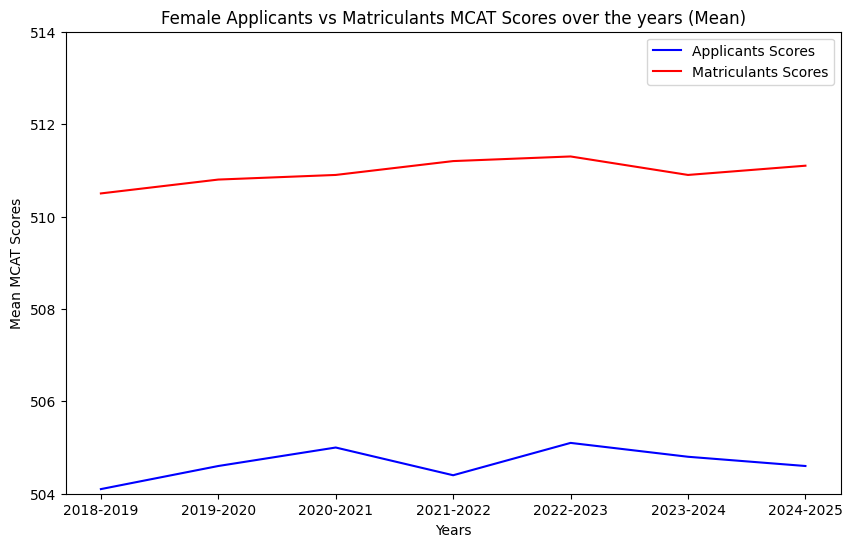

In [39]:
# Scrapped plot (but kept in case of need for future reference)

plt.figure(figsize=(10, 6))

women_applicants_scores = applicants_scores_df[applicants_scores_df['Sex'] == 'Women']
women_matriculants_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Women']
plt.plot(women_applicants_scores['Applicants (With Years)'], women_applicants_scores['Total MCAT (Mean)'], color='blue', label='Applicants Scores')
plt.plot(women_matriculants_scores['Matriculants (With Years)'], women_matriculants_scores['Total MCAT (Mean)'], color='red', label='Matriculants Scores')


plt.title("Female Applicants vs Matriculants MCAT Scores over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean MCAT Scores')
plt.ylim(504, 514)
plt.legend()

plt.show()

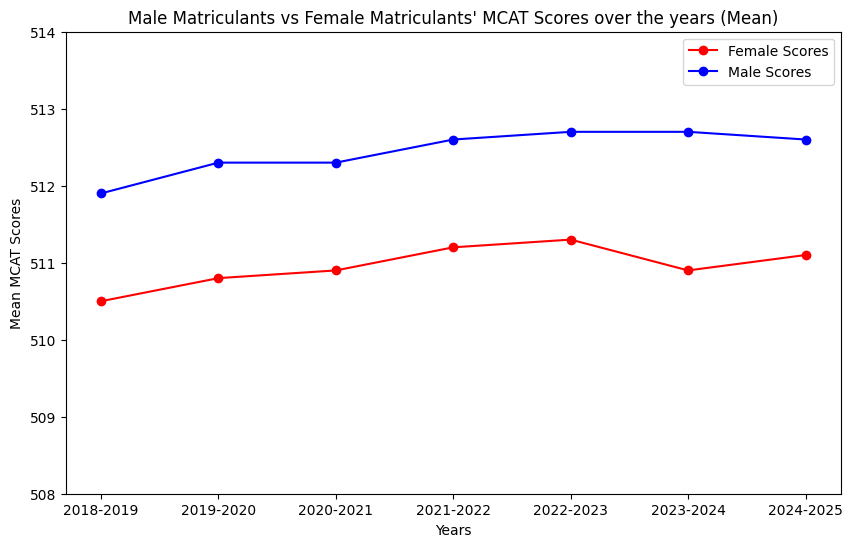

In [61]:
plt.figure(figsize=(10, 6))

women_matriculants_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Women']
plt.plot(women_matriculants_scores['Matriculants (With Years)'], women_matriculants_scores['Total MCAT (Mean)'], marker='o', color='red', label='Female Scores')

#men_applicants_scores = applicants_scores_df[applicants_scores_df['Sex'] == 'Men']
men_matriculants_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Men']
#plt.plot(men_applicants_scores['Applicants (With Years)'], men_applicants_scores['Total MCAT (Mean)'], color='blue', label='Applicants Scores')
plt.plot(men_matriculants_scores['Matriculants (With Years)'], men_matriculants_scores['Total MCAT (Mean)'], marker='o', color='blue', label='Male Scores')

#plt.title("Male Applicants vs Matriculants MCAT Scores over the years (Mean)")
plt.title("Male Matriculants vs Female Matriculants' MCAT Scores over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean MCAT Scores')
plt.ylim(508, 514)
plt.legend()

plt.show()

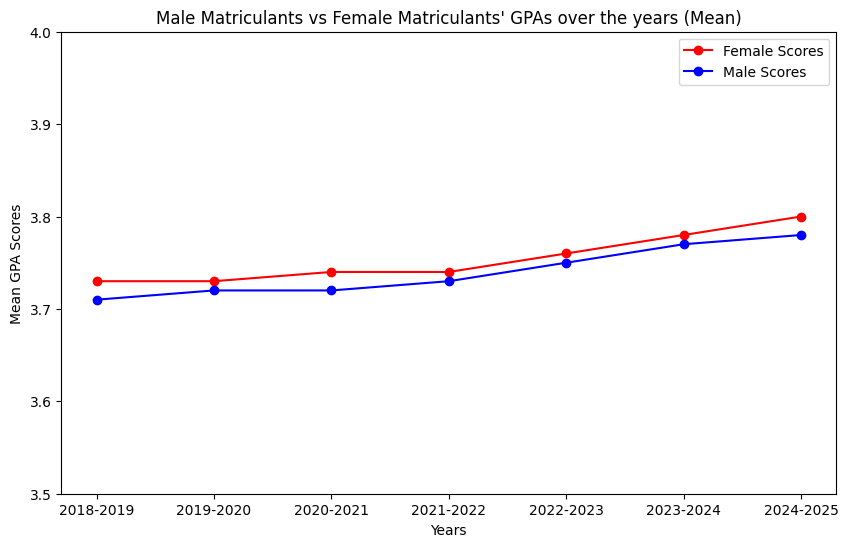

In [60]:
plt.figure(figsize=(10, 6))

women_gpa_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Women']
plt.plot(women_gpa_scores['Matriculants (With Years)'], women_gpa_scores['GPA Total (Mean)'], marker='o', color='red', label='Female Scores')

men_gpa_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Men']
plt.plot(men_gpa_scores['Matriculants (With Years)'], men_gpa_scores['GPA Total (Mean)'], marker='o', color='blue', label='Male Scores')

plt.title("Male Matriculants vs Female Matriculants' GPAs over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean GPA Scores')
plt.ylim(3.5, 4)
plt.legend()

plt.show()

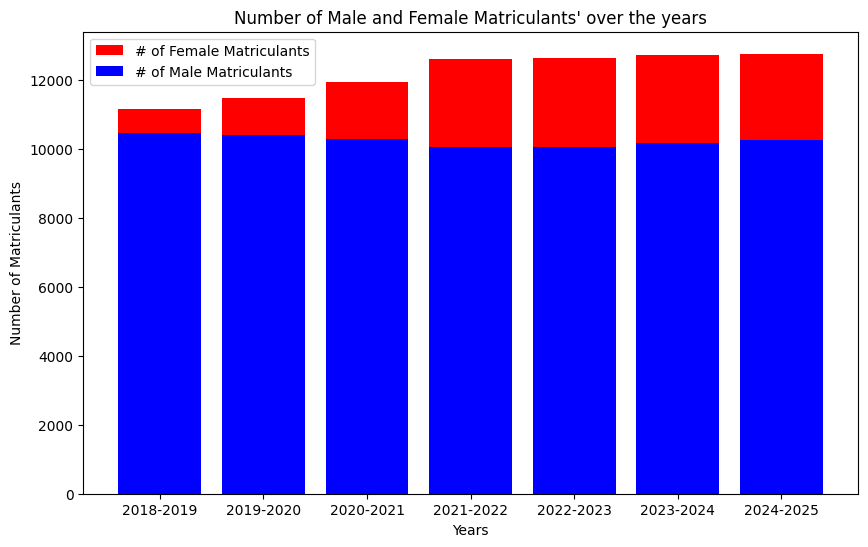

In [80]:
plt.figure(figsize=(10, 6))

women_matriculants = matriculants_total_counts[matriculants_total_counts['Gender'] == 'Women']
x_value = ['2018-2019']
x_value_2 = ['2019-2020']
x_value_3 = ['2020-2021']
x_value_4 = ['2021-2022']
x_value_5 = ['2022-2023']
x_value_6 = ['2023-2024']
x_value_7 = ['2024-2025']
plt.bar(x_value, women_matriculants['2018-2019'], color='red')
plt.bar(x_value_2, women_matriculants['2019-2020'], color='red')
plt.bar(x_value_3, women_matriculants['2020-2021'], color='red')
plt.bar(x_value_4, women_matriculants['2021-2022'], color='red')
plt.bar(x_value_5, women_matriculants['2022-2023'], color='red')
plt.bar(x_value_6, women_matriculants['2023-2024'], color='red')
plt.bar(x_value_7, women_matriculants['2024-2025'], color='red', label='# of Female Matriculants')

men_matriculants = matriculants_total_counts[matriculants_total_counts['Gender'] == 'Men']
x_value = ['2018-2019']
x_value_2 = ['2019-2020']
x_value_3 = ['2020-2021']
x_value_4 = ['2021-2022']
x_value_5 = ['2022-2023']
x_value_6 = ['2023-2024']
x_value_7 = ['2024-2025']
plt.bar(x_value, men_matriculants['2018-2019'], color='blue')
plt.bar(x_value_2, men_matriculants['2019-2020'], color='blue')
plt.bar(x_value_3, men_matriculants['2020-2021'], color='blue')
plt.bar(x_value_4, men_matriculants['2021-2022'], color='blue')
plt.bar(x_value_5, men_matriculants['2022-2023'], color='blue')
plt.bar(x_value_6, men_matriculants['2023-2024'], color='blue')
plt.bar(x_value_7, men_matriculants['2024-2025'], color='blue', label='# of Male Matriculants')

plt.title("Number of Male and Female Matriculants' over the years")
plt.xlabel('Years')
plt.ylabel('Number of Matriculants')
plt.legend()

plt.show()